# Stock Price 

In [15]:
import numpy as np

from sklearn.preprocessing import MinMaxScaler


In [31]:
prices_data = np.loadtxt('data-02-stock_daily.csv', delimiter=',')
time_steps = sequence_length = 7
dimension = 5 # open, high, low, volume, close
output_dim = 1 # close
prices_data[:3]

array([[8.28659973e+02, 8.33450012e+02, 8.28349976e+02, 1.24770000e+06,
        8.31659973e+02],
       [8.23020020e+02, 8.28070007e+02, 8.21655029e+02, 1.59780000e+06,
        8.28070007e+02],
       [8.19929993e+02, 8.24400024e+02, 8.18979980e+02, 1.28170000e+06,
        8.24159973e+02]])

In [35]:
xy = prices_data[::-1] # reverse order (chronically ordered)
scaler = MinMaxScaler()
scaler.fit(xy)
x = scaler.transform(xy)
y = x[:, [-1]] # close as label
dataX = []
dataY = []
for i in range(0, len(y) - sequence_length):
    _x = x[i:i + sequence_length]
    _y = y[i + sequence_length] # next close price
    print(_x, "->", _y)
    dataX.append(_x)
    dataY.append(_y)

    

[[2.13751054e-01 2.08179810e-01 1.91791832e-01 4.66075110e-04
  1.92092403e-01]
 [1.93935034e-01 2.03641926e-01 2.08664571e-01 2.98467330e-03
  1.96551555e-01]
 [2.10516454e-01 2.05289413e-01 2.03558748e-01 2.59926504e-04
  1.87749731e-01]
 [1.86678765e-01 2.09480567e-01 2.08781843e-01 0.00000000e+00
  2.17448151e-01]
 [3.06973882e-01 3.14634137e-01 2.18993665e-01 1.24764722e-02
  2.16981885e-01]
 [2.19142111e-01 2.63907214e-01 2.24686396e-01 4.56323384e-01
  2.24967474e-01]
 [2.33129931e-01 2.36419163e-01 1.62682724e-01 5.70171193e-01
  1.47442742e-01]] -> [0.13289962]
[[1.93935034e-01 2.03641926e-01 2.08664571e-01 2.98467330e-03
  1.96551555e-01]
 [2.10516454e-01 2.05289413e-01 2.03558748e-01 2.59926504e-04
  1.87749731e-01]
 [1.86678765e-01 2.09480567e-01 2.08781843e-01 0.00000000e+00
  2.17448151e-01]
 [3.06973882e-01 3.14634137e-01 2.18993665e-01 1.24764722e-02
  2.16981885e-01]
 [2.19142111e-01 2.63907214e-01 2.24686396e-01 4.56323384e-01
  2.24967474e-01]
 [2.33129931e-01 2.3641

In [37]:
train_size = int(len(dataY) * 0.7)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(
    dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(
    dataY[train_size:len(dataY)])

In [44]:
import tensorflow as tf
import keras

hidden_dim = 25

# build keras lstm layer

# run dynamic rnn
model = keras.models.Sequential([
    keras.layers.LSTM(hidden_dim, input_shape=(sequence_length, dimension)),
    keras.layers.Dense(output_dim)
])

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=128)

model.summary()

test_predict = model.predict(testX)



Epoch 1/200
4/4 [==============================] - 1s 3ms/step - loss: 0.1289
Epoch 2/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0633
Epoch 3/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0213
Epoch 4/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 5/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0069
Epoch 6/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0114
Epoch 7/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0097
Epoch 8/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 9/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 10/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 11/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 12/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 13/200
4/4 [==============================] - 0s 2ms/st

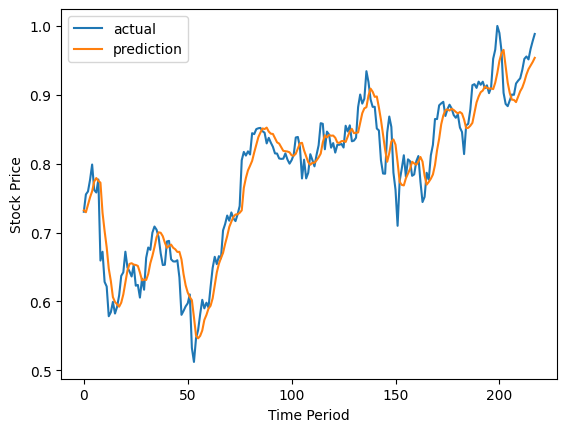

In [47]:
import matplotlib.pyplot as plt
plt.plot(testY)
plt.plot(test_predict)
plt.xlabel("Time Period")
plt.ylabel("Stock Price")
plt.legend(['actual', 'prediction'], loc='upper left')
plt.show()

In [1]:
from keras.src.preprocessing.sequence import TimeseriesGenerator
import numpy as np
data = np.array([[i] for i in range(50)])
targets = np.array([[i] for i in range(50)])
data_gen = TimeseriesGenerator(data, targets,
                               length=10, sampling_rate=2,
                               batch_size=2)
assert len(data_gen) == 20
batch_0 = data_gen[0]
x, y = batch_0
assert np.array_equal(x,
                      np.array([[[0], [2], [4], [6], [8]],
                                [[1], [3], [5], [7], [9]]]))
assert np.array_equal(y,
                      np.array([[10], [11]]))